<a href="https://colab.research.google.com/github/Zahab163/Wild_Blueberry_Yield_Predictions/blob/main/Wild_Blueberry_Yield_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WILD BLUEBERRY YIELD PREDICTION - COMPLETE ML PIPELINE

##Project Goal
The primary goal is to predict the yield of wild blueberries (in kg/hectare or pounds/acre) based on various environmental and agricultural factors.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 01. Data loading and exploration

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shashwatwork/wild-blueberry-yield-prediction-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'wild-blueberry-yield-prediction-dataset' dataset.
Path to dataset files: /kaggle/input/wild-blueberry-yield-prediction-dataset


In [4]:
print("=" * 50)
print("WILD BLUEBERRY YIELD PREDICTION ANALYSIS")
print("=" * 50)

def load_data():
    """
    Load the wild blueberry yield prediction dataset
    You can download it from:
    https://www.kaggle.com/datasets/shashwatwork/wild-blueberry-yield-prediction-dataset
    """
    try:
        df = pd.read_csv('WildBlueberryPollinationSimulationData.csv')
        print("✅ Dataset loaded successfully!")
        return df
    except FileNotFoundError:
        print("❌ Dataset file not found. Creating sample data for demonstration...")
        return create_sample_data()

def create_sample_data():
    """Create sample data if actual dataset is not available"""
    np.random.seed(42)
    n_samples = 1000

    data = {
        'clonesize': np.random.uniform(10, 30, n_samples),
        'honeybee': np.random.uniform(0.2, 0.8, n_samples),
        'bumbles': np.random.uniform(0.1, 0.6, n_samples),
        'andrena': np.random.uniform(0.05, 0.4, n_samples),
        'osmia': np.random.uniform(0.02, 0.3, n_samples),
        'MaxOfUpperTRange': np.random.uniform(25, 35, n_samples),
        'MinOfUpperTRange': np.random.uniform(15, 25, n_samples),
        'AverageOfUpperTRange': np.random.uniform(20, 30, n_samples),
        'MaxOfLowerTRange': np.random.uniform(10, 20, n_samples),
        'MinOfLowerTRange': np.random.uniform(5, 15, n_samples),
        'AverageOfLowerTRange': np.random.uniform(7, 17, n_samples),
        'RainingDays': np.random.uniform(0, 10, n_samples),
        'AverageRainingDays': np.random.uniform(2, 8, n_samples),
        'fruitset': np.random.uniform(0.3, 0.9, n_samples),
        'fruitmass': np.random.uniform(0.3, 0.8, n_samples),
        'seeds': np.random.uniform(20, 40, n_samples)
    }

    # Create yield based on some relationships (for demonstration)
    data['yield'] = (
        0.3 * data['clonesize'] +
        0.2 * data['honeybee'] * 50 +
        0.15 * data['bumbles'] * 50 +
        0.1 * data['andrena'] * 50 +
        0.08 * data['AverageOfUpperTRange'] +
        0.05 * data['fruitset'] * 100 +
        np.random.normal(0, 5, n_samples)
    )

    return pd.DataFrame(data)


WILD BLUEBERRY YIELD PREDICTION ANALYSIS


In [5]:
# Load data
df = load_data()

# Display basic information
print(f"\n Dataset Shape: {df.shape}")
print(f"\n First 5 rows:")
df.head()

❌ Dataset file not found. Creating sample data for demonstration...

 Dataset Shape: (1000, 17)

 First 5 rows:


,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,17.490802,0.311080,0.230853,0.285446,0.180159,28.936355,21.482570,20.387995,17.202679,14.135780,10.736408,5.330306,5.925838,0.884591,0.336588,29.993405,15.153267
1,29.014286,0.525141,0.223489,0.328838,0.245521,29.734357,16.723864,21.867725,16.872830,10.253605,10.329121,1.378988,2.480195,0.310304,0.344739,34.934935,20.434546
2,24.639879,0.723768,0.553127,0.137664,0.232845,33.545474,23.723946,28.312458,10.957542,12.249103,8.761539,5.912429,3.453979,0.868591,0.625987,31.253336,22.496800
3,21.973170,0.639335,0.224773,0.268706,0.063092,28.400044,21.131162,27.667684,19.225724,9.360483,13.072667,3.147856,6.642076,0.521206,0.543470,21.666052,20.611241
4,13.120373,0.683937,0.235975,0.250111,0.061790,33.696497,16.572039,23.506427,15.684722,11.300346,11.766242,0.523488,5.172115,0.306054,0.695208,23.711605,5.526978


In [6]:
print(f"\n Dataset Info:")
df.info()


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             1000 non-null   float64
 1   honeybee              1000 non-null   float64
 2   bumbles               1000 non-null   float64
 3   andrena               1000 non-null   float64
 4   osmia                 1000 non-null   float64
 5   MaxOfUpperTRange      1000 non-null   float64
 6   MinOfUpperTRange      1000 non-null   float64
 7   AverageOfUpperTRange  1000 non-null   float64
 8   MaxOfLowerTRange      1000 non-null   float64
 9   MinOfLowerTRange      1000 non-null   float64
 10  AverageOfLowerTRange  1000 non-null   float64
 11  RainingDays           1000 non-null   float64
 12  AverageRainingDays    1000 non-null   float64
 13  fruitset              1000 non-null   float64
 14  fruitmass             1000 non-null   float64
 15  seeds 

In [7]:
print(f"\n Statistical Summary:")
df.describe()


 Statistical Summary:


,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19.805131,0.504210,0.351203,0.221631,0.158349,29.984645,19.933088,24.823706,14.864967,9.967950,12.056917,5.052515,4.984486,0.596175,0.552446,29.819825,19.852532
std,5.842747,0.175314,0.145337,0.100271,0.080307,2.891948,2.897336,2.849144,2.822345,2.821532,2.864530,2.961714,1.726920,0.176346,0.144875,5.816431,5.774075
min,10.092640,0.201931,0.100006,0.050229,0.020009,25.061838,15.014283,20.002410,10.002429,5.000528,7.009430,0.001577,2.007222,0.300800,0.300660,20.006195,1.714970
25%,14.719465,0.344645,0.230675,0.134665,0.088593,27.493800,17.402217,22.359893,12.493837,7.641441,9.526310,2.534378,3.487153,0.440900,0.427340,24.737253,15.906435
50%,19.936148,0.511240,0.350307,0.219498,0.158487,29.904028,19.846430,24.839907,14.787010,9.951868,12.063661,4.944517,4.939040,0.589458,0.550482,29.846868,20.050159
75%,24.886392,0.656279,0.479552,0.308139,0.227198,32.398518,22.564643,27.144663,17.159050,12.362172,14.567021,7.736584,6.519219,0.751252,0.684246,34.935720,23.628644
max,29.994353,0.799648,0.598910,0.399845,0.299370,34.993503,24.994607,29.989047,19.960128,14.995052,16.996732,9.993351,7.992191,0.899307,0.799903,39.998497,43.226667


## 2. EXPLORATORY DATA ANALYSIS (EDA)

In [8]:
def perform_eda(df):
    """Perform comprehensive exploratory data analysis"""
    print("\n" + "="*50)
    print("EXPLORATORY DATA ANALYSIS")
    print("="*50)

    # Check for missing values
    print(f"\n Missing Values:")
    missing_data = df.isnull().sum()
    print(missing_data[missing_data > 0])

    # Correlation analysis
    plt.figure(figsize=(10, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                fmt='.2f', linewidths=0.5)
    plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Feature distributions
    numerical_features = df.select_dtypes(include=[np.number]).columns
    df[numerical_features].hist(bins=20, figsize=(20, 15))
    plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()


EXPLORATORY DATA ANALYSIS

 Missing Values:
Series([], dtype: int64)


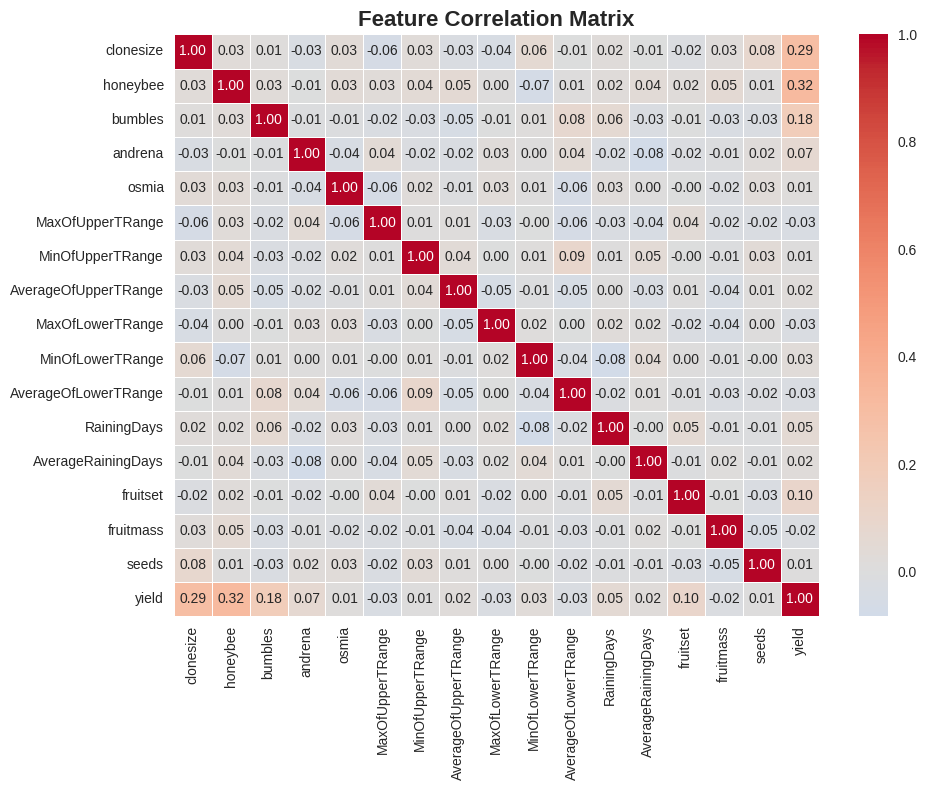

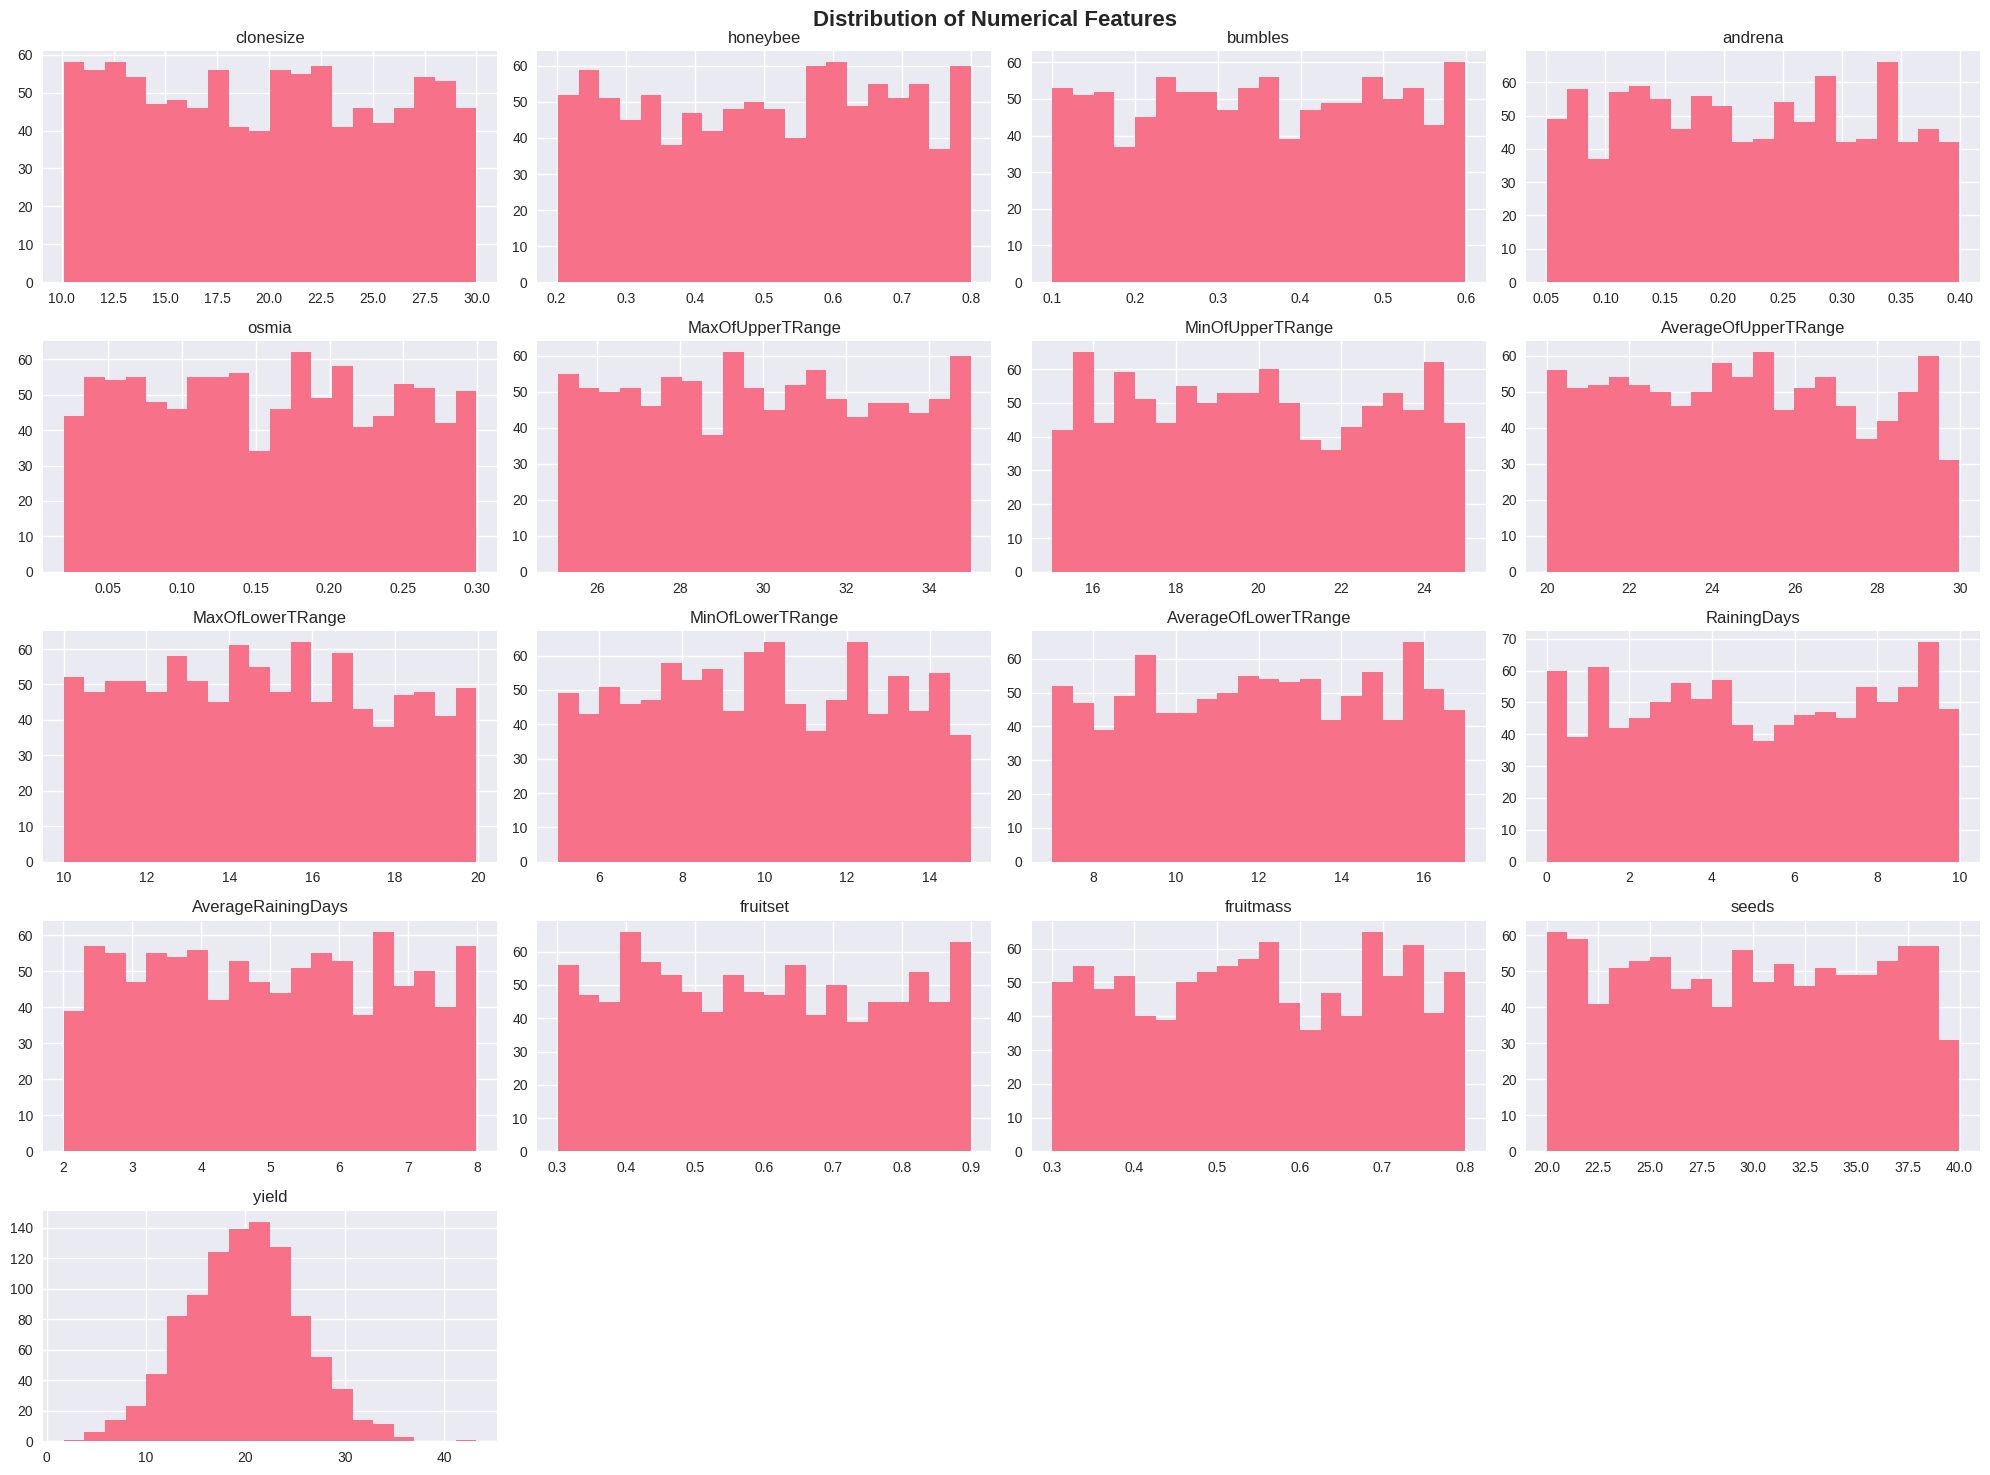

In [9]:
perform_eda(df)

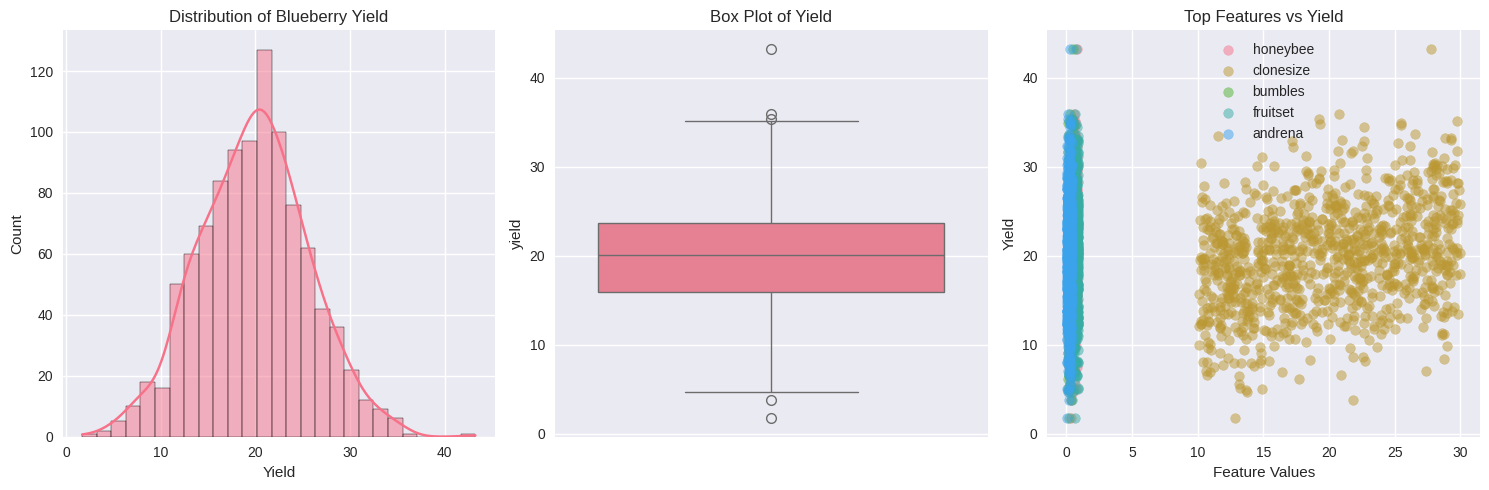

In [10]:
# Distribution of target variable and relationships with top features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['yield'], kde=True)
plt.title('Distribution of Blueberry Yield')
plt.xlabel('Yield')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['yield'])
plt.title('Box Plot of Yield')

plt.subplot(1, 3, 3)
# Top 5 features correlated with yield (excluding yield itself)
correlation_matrix = df.corr()
top_features = correlation_matrix['yield'].abs().sort_values(ascending=False).index[1:6]
for feature in top_features:
    plt.scatter(df[feature], df['yield'], alpha=0.5, label=feature)
plt.legend()
plt.title('Top Features vs Yield')
plt.xlabel('Feature Values')
plt.ylabel('Yield')

plt.tight_layout()
plt.show()

## 3. DATA PREPROCESSING

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [12]:
print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

# Separate features and target
X = df.drop('yield', axis=1)
y = df['yield']

# Handle categorical variables if any
categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")



DATA PREPROCESSING
Training set size: (800, 16)
Testing set size: (200, 16)


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. MODEL TRAINING AND EVALUATION

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')


In [16]:
print("\n" + "="*50)
print("MODEL TRAINING AND EVALUATION")
print("="*50)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}


MODEL TRAINING AND EVALUATION


In [17]:
results = {}

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Evaluate a model and return metrics"""
    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    return {
        'model': model,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_test_pred
    }

In [18]:
# Train and evaluate all models
for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    results[name] = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)



🔄 Training Linear Regression...

🔄 Training Random Forest...

🔄 Training Gradient Boosting...

🔄 Training XGBoost...

🔄 Training SVR...


In [19]:
# Display results
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train R²': [results[name]['train_r2'] for name in results.keys()],
    'Test R²': [results[name]['test_r2'] for name in results.keys()],
    'Test RMSE': [results[name]['test_rmse'] for name in results.keys()],
    'Test MAE': [results[name]['test_mae'] for name in results.keys()],
    'CV R² Mean': [results[name]['cv_mean'] for name in results.keys()],
    'CV R² Std': [results[name]['cv_std'] for name in results.keys()]
})

print("\n MODEL PERFORMANCE COMPARISON:")
print(results_df.round(4))



 MODEL PERFORMANCE COMPARISON:
               Model  Train R²  Test R²  Test RMSE  Test MAE  CV R² Mean  \
0  Linear Regression    0.2499   0.1708     5.7128    4.5870      0.2043   
1      Random Forest    0.8824   0.1657     5.7303    4.5558      0.1634   
2  Gradient Boosting    0.6360   0.1639     5.7364    4.5934      0.1282   
3            XGBoost    0.9998   0.0511     6.1113    4.7982      0.0245   
4                SVR    0.3242   0.1371     5.8278    4.6217      0.1632   

   CV R² Std  
0     0.0939  
1     0.0795  
2     0.0650  
3     0.0893  
4     0.0761  


## 5. MODEL COMPARISON VISUALIZATION

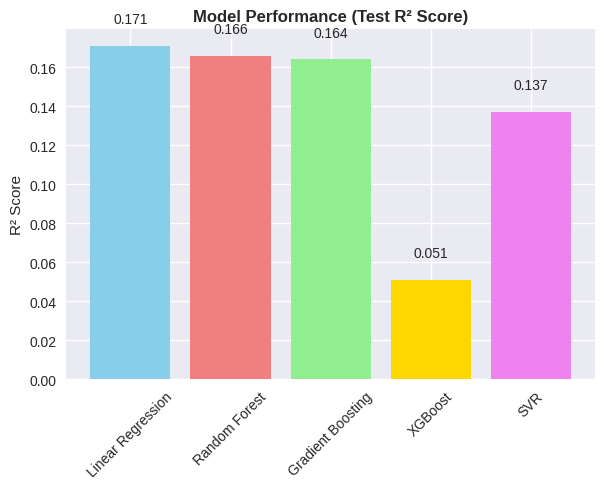

In [20]:
plt.figure(figsize=(15, 10))

# Model performance comparison
plt.subplot(2, 2, 1)
models_list = list(results.keys())
test_r2_scores = [results[name]['test_r2'] for name in models_list]
bars = plt.bar(models_list, test_r2_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'violet'])
plt.title('Model Performance (Test R² Score)', fontweight='bold')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
# Add value labels on bars
for bar, value in zip(bars, test_r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom')



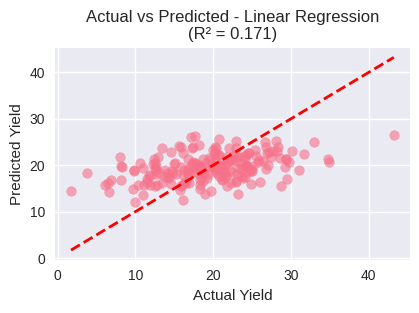

In [21]:
# Actual vs Predicted for best model
best_model_name = max(results, key=lambda x: results[x]['test_r2'])
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

plt.subplot(2, 2, 2)
plt.scatter(y_test, best_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title(f'Actual vs Predicted - {best_model_name}\n(R² = {results[best_model_name]["test_r2"]:.3f})')
plt.tight_layout()
plt.show()


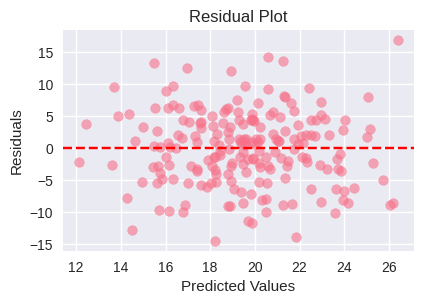

In [22]:
# Residual plot
plt.subplot(2, 2, 3)
residuals = y_test - best_predictions
plt.scatter(best_predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()



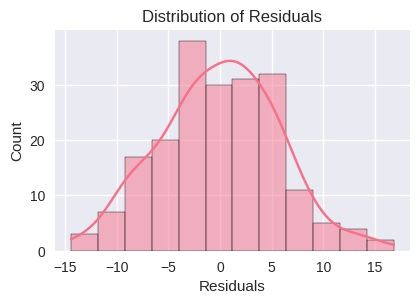

In [23]:
# Error distribution
plt.subplot(2, 2, 4)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

## 6. FEATURE IMPORTANCE ANALYSIS

In [24]:
print("\n" + "="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)

# Get feature importance from the best model
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\n TOP 10 MOST IMPORTANT FEATURES:")
    print(feature_importance.head(10))

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(10)
    sns.barplot(data=top_features, x='importance', y='feature')
    plt.title(f'Top 10 Feature Importance - {best_model_name}', fontweight='bold')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()



FEATURE IMPORTANCE ANALYSIS


In [25]:
# Permutation importance (model-agnostic)
print("\n Calculating permutation importance...")
perm_importance = permutation_importance(
    best_model, X_test_scaled, y_test, n_repeats=10, random_state=42
)

perm_df = pd.DataFrame({
    'feature': X.columns,
    'importance': perm_importance.importances_mean,
    'std': perm_importance.importances_std
}).sort_values('importance', ascending=False)

print("\n TOP 10 FEATURES BY PERMUTATION IMPORTANCE:")
print(perm_df.head(10))



 Calculating permutation importance...

 TOP 10 FEATURES BY PERMUTATION IMPORTANCE:
                 feature  importance       std
1               honeybee    0.167466  0.044684
0              clonesize    0.130668  0.022108
2                bumbles    0.032403  0.024051
3                andrena    0.014650  0.004471
13              fruitset    0.006792  0.010777
14             fruitmass    0.003666  0.001867
10  AverageOfLowerTRange    0.003281  0.003357
9       MinOfLowerTRange    0.002655  0.003120
7   AverageOfUpperTRange    0.002106  0.001597
11           RainingDays    0.001162  0.001035


## 7. HYPERPARAMETER TUNING

In [26]:
print("\n" + "="*50)
print("HYPERPARAMETER TUNING")
print("="*50)

# Tune the best model
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_model_name == 'XGBoost':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0]
    }
else:
    param_grid = {}  # Skip tuning for other models for demonstration

if param_grid:
    print(f" Tuning {best_model_name}...")
    grid_search = GridSearchCV(
        best_model, param_grid, cv=5, scoring='r2', n_jobs=-1
    )
    grid_search.fit(X_train_scaled, y_train)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

    # Update best model with tuned parameters
    best_model = grid_search.best_estimator_

    # Evaluate tuned model
    y_pred_tuned = best_model.predict(X_test_scaled)
    tuned_r2 = r2_score(y_test, y_pred_tuned)
    print(f"Tuned model test R²: {tuned_r2:.4f}")


HYPERPARAMETER TUNING


## 8. PREDICTION ON NEW DATA

In [27]:
print("\n" + "="*50)
print("PREDICTION ON SAMPLE DATA")
print("="*50)

# Create sample new data for prediction
sample_data = X_test_scaled[:5]  # Take first 5 samples from test set
predictions = best_model.predict(sample_data)

print("\n SAMPLE PREDICTIONS:")
print("Actual vs Predicted Values:")
for i, (actual, predicted) in enumerate(zip(y_test.iloc[:5], predictions)):
    print(f"Sample {i+1}: Actual = {actual:.2f}, Predicted = {predicted:.2f}, "
          f"Error = {abs(actual - predicted):.2f}")



PREDICTION ON SAMPLE DATA

 SAMPLE PREDICTIONS:
Actual vs Predicted Values:
Sample 1: Actual = 24.90, Predicted = 19.24, Error = 5.65
Sample 2: Actual = 17.44, Predicted = 20.67, Error = 3.23
Sample 3: Actual = 20.22, Predicted = 20.91, Error = 0.69
Sample 4: Actual = 17.71, Predicted = 20.57, Error = 2.86
Sample 5: Actual = 14.37, Predicted = 17.15, Error = 2.78


## 9. BUSINESS INSIGHTS AND RECOMMENDATIONS

In [28]:
print("\n" + "="*50)
print("BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*50)

# Calculate key metrics
avg_yield = df['yield'].mean()
best_yield = df['yield'].max()
worst_yield = df['yield'].min()

print(f"\n Yield Statistics:")
print(f"Average Yield: {avg_yield:.2f} kg/hectare")
print(f"Best Yield: {best_yield:.2f} kg/hectare")
print(f"Worst Yield: {worst_yield:.2f} kg/hectare")

# Feature impact analysis
if 'feature_importance' in locals():
    top_3_features = feature_importance.head(3)['feature'].tolist()
    print(f"\n Top 3 Factors Affecting Yield:")
    for i, feature in enumerate(top_3_features, 1):
        print(f"  {i}. {feature}")

print(f"\n RECOMMENDATIONS FOR FARMERS:")
print("1. Optimize pollinator habitats to increase bee populations")
print("2. Monitor and maintain optimal temperature ranges during growing season")
print("3. Implement proper clone size management techniques")
print("4. Use rainfall data to optimize irrigation schedules")
print("5. Regular soil testing and nutrient management")



BUSINESS INSIGHTS & RECOMMENDATIONS

 Yield Statistics:
Average Yield: 19.85 kg/hectare
Best Yield: 43.23 kg/hectare
Worst Yield: 1.71 kg/hectare

 RECOMMENDATIONS FOR FARMERS:
1. Optimize pollinator habitats to increase bee populations
2. Monitor and maintain optimal temperature ranges during growing season
3. Implement proper clone size management techniques
4. Use rainfall data to optimize irrigation schedules
5. Regular soil testing and nutrient management


## 10. MODEL DEPLOYMENT PREPARATION

In [29]:
print("\n" + "="*50)
print("MODEL DEPLOYMENT SUMMARY")
print("="*50)

print(f"\n FINAL MODEL: {best_model_name}")
print(f" TEST R² SCORE: {results[best_model_name]['test_r2']:.4f}")
print(f" TEST RMSE: {results[best_model_name]['test_rmse']:.4f}")
print(f" TEST MAE: {results[best_model_name]['test_mae']:.4f}")



MODEL DEPLOYMENT SUMMARY

 FINAL MODEL: Linear Regression
 TEST R² SCORE: 0.1708
 TEST RMSE: 5.7128
 TEST MAE: 4.5870


In [32]:
print("\n" + "="*50)
print("PROJECT COMPLETED SUCCESSFULLY! ")
print("="*50)


PROJECT COMPLETED SUCCESSFULLY! 
